In [1]:
from datasets import load_dataset
import matplotlib.pyplot as plt

c:\Cove\Python Projects\testcase_generation\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Загрузка исходного датасета
dataset = load_dataset("kumarharsh1812/test")

# Выбор нужных колонок
selected_dataset = dataset['train'].select_columns(["test_scenario", "test_steps"])

In [14]:
def plot_sequence_lengths(dataset_obj):

    # Список для хранения длин последовательностей
    sequence_lengths = []

    # Список индексов слишком длинных последовательностей
    too_long = []

    # В цикле проходим по датасету и заполняем пустые списки
    for idx, example in enumerate(dataset_obj):
        sequence_lengths.append(len(example['test_scenario']) + len(example['test_steps']))
        if sequence_lengths[idx] > 400:
          too_long.append(idx)

    # Отрисовываем гистограмму распределения длин последовательностей
    plt.hist(sequence_lengths, bins=30)
    plt.xlabel('Sequence Length')
    plt.ylabel('Count')
    plt.title('Distribution of Text Sequence Lengths')
    plt.show()

    return too_long

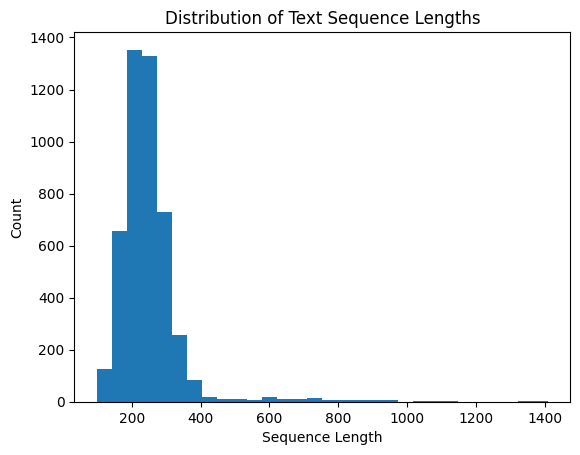

In [11]:
indexes_to_drop = plot_sequence_lengths(selected_dataset)

In [13]:
len(indexes_to_drop)/len(selected_dataset)

0.03060132677081104

В датасете у нас есть 3% слишком длинных последовательностей, которые мы можем без особого вреда удалить для ускорения обучения.

In [15]:
dataset_reduced = selected_dataset.select(
    i for i in range(len(selected_dataset)) if i not in set(indexes_to_drop)
)

Parameter 'indices'=<generator object <genexpr> at 0x000001B4C86820A0> of the transform datasets.arrow_dataset.Dataset.select couldn't be hashed properly, a random hash was used instead. Make sure your transforms and parameters are serializable with pickle or dill for the dataset fingerprinting and caching to work. If you reuse this transform, the caching mechanism will consider it to be different from the previous calls and recompute everything. This warning is only showed once. Subsequent hashing failures won't be showed.


In [16]:
dataset_reduced

Dataset({
    features: ['test_scenario', 'test_steps'],
    num_rows: 4530
})

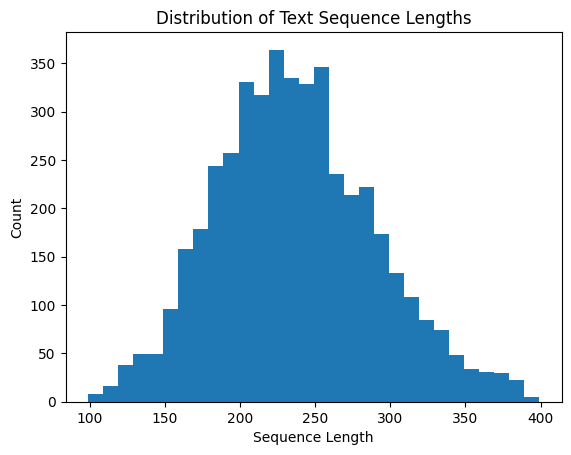

[]

In [17]:
# Посмотрим получившееся распределение длин последовательностей
plot_sequence_lengths(dataset_reduced)

In [18]:

# Разделение на тренировочную и тестовую выборки (80/20)
split_dataset = dataset_reduced.train_test_split(test_size=0.2, seed=42)

In [19]:
split_dataset['train'][:3]

{'test_scenario': ['Verify that event security measures can be customized for different types of events.',
  'Test the platform\'s responsiveness to user clicking on the "Play" button.',
  'Verify that a user cannot delete a group they did not create.'],
 'test_steps': ['1. Log in to the event management platform as an authorized user.\n2. Select a specific event type and configure security measures accordingly.',
  '1. Click on the "Play" button for a video.\n2. Observe the time taken for the video to start playing.',
  '1. Log in to the social networking app using valid credentials.\n2. Navigate to a group that the user did not create.\n3. Attempt to delete the group.\n4. Verify if the system allows the deletion action.']}

In [20]:
split_dataset['test'][:3]

{'test_scenario': ['Verify that the event management platform can integrate with the mobile app successfully.',
  "Test the platform's performance during peak usage times on a specific day (e.g., Black Friday sales).",
  'Verify that the platform recommends content based on friend interactions.'],
 'test_steps': ['1. Launch the event management platform on the mobile app.\n2. Log in using valid credentials.\n3. Navigate to the event integration feature.\n4. Attempt to integrate a sample event with the mobile app.',
  "1. Simulate high traffic volume during peak hours on a designated day.\n2. Analyze the platform's response time and server capacity under heavy load.",
  "1. Log in to the platform with a user having at least one friend.\n2. Navigate to the recommendation section.\n3. Check if content recommended is influenced by the user's friends' interactions."]}

In [21]:
# Сохранение полученного датасета в локальную директорию 'dataset'
split_dataset.save_to_disk('dataset')

Saving the dataset (1/1 shards): 100%|██████████| 906/906 [00:00<00:00, 106187.88 examples/s]
